In [15]:
import pandas as pd
import numpy as np
dataRaw = pd.read_csv("Energy_Data_20200920_20231027.csv")

dataRaw

,dtm,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price
0,2020-09-20T00:00:00Z,20.06,0.0,2108.489754,2206.064655,996.284,2.50,0.0,32.17
1,2020-09-20T00:30:00Z,19.77,0.0,2108.489754,2206.064655,957.576,15.00,0.0,32.17
2,2020-09-20T01:00:00Z,28.68,0.0,2108.489754,2206.064655,941.044,47.95,0.0,32.00
3,2020-09-20T01:30:00Z,28.97,0.0,2108.489754,2206.064655,964.366,29.13,0.0,32.00
4,2020-09-20T02:00:00Z,28.19,0.0,2108.489754,2206.064655,918.432,28.95,0.0,31.99
...,...,...,...,...,...,...,...,...,...
54379,2023-10-27T21:30:00Z,NaN,0.0,2331.383994,2487.180474,275.444,129.00,0.0,82.47
54380,2023-10-27T22:00:00Z,NaN,0.0,2331.383994,2487.180474,132.522,129.00,0.0,64.31
54381,2023-10-27T22:30:00Z,NaN,0.0,2331.383994,2487.180474,64.226,133.00,0.0,64.31
54382,2023-10-27T23:00:00Z,86.84,0.0,2331.383994,2487.180474,28.662,133.00,0.0,58.68


In [ ]:
"""
Part : Preprocessing
"""

In [17]:
dataRaw.dtypes

dtm                             object
MIP                            float64
Solar_MW                       float64
Solar_capacity_mwp             float64
Solar_installedcapacity_mwp    float64
Wind_MW                        float64
SS_Price                       float64
boa_MWh                        float64
DA_Price                       float64
dtype: object

In [20]:
dataRaw['dtm'] = pd.to_datetime(dataRaw['dtm'])

dataRaw['year'] = dataRaw['dtm'].dt.year
dataRaw['month'] = dataRaw['dtm'].dt.month
dataRaw['day'] = dataRaw['dtm'].dt.day
dataRaw['hour'] = dataRaw['dtm'].dt.hour
dataRaw['minute'] = dataRaw['dtm'].dt.minute
dataRaw['second'] = dataRaw['dtm'].dt.second

dataRaw2 = dataRaw.drop('dtm',axis=1)

In [21]:
dataRaw2.dtypes

MIP                            float64
Solar_MW                       float64
Solar_capacity_mwp             float64
Solar_installedcapacity_mwp    float64
Wind_MW                        float64
SS_Price                       float64
boa_MWh                        float64
DA_Price                       float64
year                             int64
month                            int64
day                              int64
hour                             int64
minute                           int64
second                           int64
dtype: object

In [11]:
"""
PART : Imputation of the missing data
"""

'\nPART : Imputation of the missing data\n'

In [22]:
dataRaw2.isna().sum()

MIP                            321
Solar_MW                        75
Solar_capacity_mwp               0
Solar_installedcapacity_mwp      0
Wind_MW                        103
SS_Price                         0
boa_MWh                        103
DA_Price                         0
year                             0
month                            0
day                              0
hour                             0
minute                           0
second                           0
dtype: int64

In [23]:
NombreNA = dataRaw2.isna().sum().sum()
row,col = dataRaw2.shape[0],dataRaw2.shape[1]
PourcentageNA = NombreNA*100/(row*col)
PourcentageNA


0.07906737275669315

In [ ]:
"""
The amount of missing data seems quite low (0.08% < 5% of the total of the data from dataset).
It may not be interesting to impute them.
However, we wanted to experiment an Imputer especially the KNN Imputer which will allow to associate the missing data to a group with similiar values.
And not by imputating by the mean value which will create a distorsion on the values of the dataset
"""

In [26]:
from sklearn.impute import KNNImputer
dataImputed = KNNImputer(missing_values=np.nan,n_neighbors=3).fit_transform(dataRaw2)
dataImputed = pd.DataFrame(dataImputed, columns=dataRaw2.columns)
dataImputed

,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price,year,month,day,hour,minute,second
0,20.06,0.0,2108.489754,2206.064655,996.284,2.50,0.0,32.17,2020.0,9.0,20.0,0.0,0.0,0.0
1,19.77,0.0,2108.489754,2206.064655,957.576,15.00,0.0,32.17,2020.0,9.0,20.0,0.0,30.0,0.0
2,28.68,0.0,2108.489754,2206.064655,941.044,47.95,0.0,32.00,2020.0,9.0,20.0,1.0,0.0,0.0
3,28.97,0.0,2108.489754,2206.064655,964.366,29.13,0.0,32.00,2020.0,9.0,20.0,1.0,30.0,0.0
4,28.19,0.0,2108.489754,2206.064655,918.432,28.95,0.0,31.99,2020.0,9.0,20.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54379,88.71,0.0,2331.383994,2487.180474,275.444,129.00,0.0,82.47,2023.0,10.0,27.0,21.0,30.0,0.0
54380,104.40,0.0,2331.383994,2487.180474,132.522,129.00,0.0,64.31,2023.0,10.0,27.0,22.0,0.0,0.0
54381,87.20,0.0,2331.383994,2487.180474,64.226,133.00,0.0,64.31,2023.0,10.0,27.0,22.0,30.0,0.0
54382,86.84,0.0,2331.383994,2487.180474,28.662,133.00,0.0,58.68,2023.0,10.0,27.0,23.0,0.0,0.0


In [27]:
dataImputed.isna().sum()

MIP                            0
Solar_MW                       0
Solar_capacity_mwp             0
Solar_installedcapacity_mwp    0
Wind_MW                        0
SS_Price                       0
boa_MWh                        0
DA_Price                       0
year                           0
month                          0
day                            0
hour                           0
minute                         0
second                         0
dtype: int64

In [ ]:
"""
Part : Observation
"""

In [32]:
import matplotlib.pyplot as plt

def plot_data2D(df, x_col, y_col, title="Graphique", x_label="X-axis", y_label="Y-axis", grid=True, line_style='-', marker_style='o', color='b'):
    
    plt.figure(figsize=(10, 5))  
    plt.plot(df[x_col], df[y_col], linestyle=line_style, marker=marker_style, color=color)  
    plt.title(title)  
    plt.xlabel(x_label)  
    plt.ylabel(y_label)  
    if grid:
        plt.grid(True)  
    plt.show()

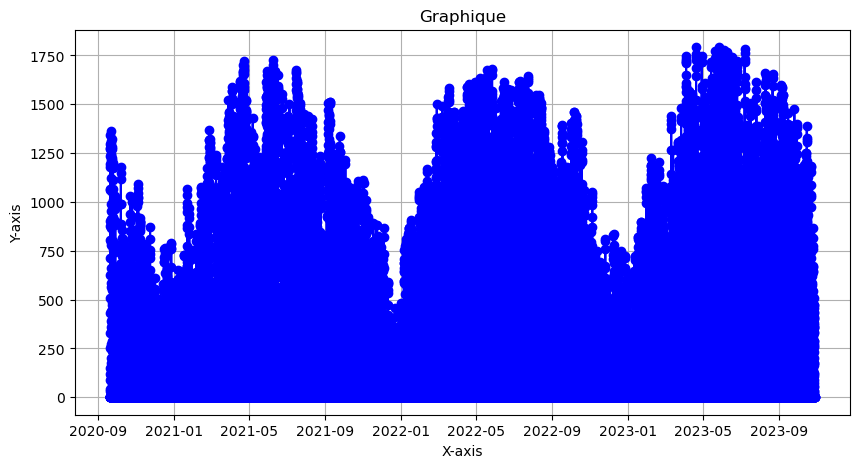

In [35]:
dataImputed2 = pd.concat([dataImputed,dataRaw['dtm']],axis=1)
plot_data2D(dataImputed2,'dtm','Solar_MW')


In [ ]:
"""
Part : NC files
"""

In [ ]:
"""
Part : Preprocessing 2 (Selection, creation of interesting features)
"""

In [ ]:
"""
Part : Prediction with Linear Regression
"""

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model = LinearRegression()
X,y = dataImputed.drop('Solar_MW',axis=1),dataImputed['Solar_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)*100
print("Score : ",score)

Score :  3.603329765276597


In [ ]:
"""
Part : Prediction with Random Forest
"""

In [ ]:
"""
Part : Prediction with Neural Networks
"""

In [ ]:
"""
Part : Prediction with ...
"""

In [ ]:
"""
Part : Best Model 
"""

In [41]:
"""
Part : DashBoard
"""

'\nPart : DashBoard\n'

In [42]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialisation de l'application Dash
app = Dash(__name__)

# Layout de l'application
app.layout = html.Div([
    html.Div(children='Régression Linéaire avec Dash'),
    html.Button('Lancer la prédiction', id='predict-button'),
    dcc.Graph(id='prediction-graph'),
])

# Assumons que data_final et data_final2 sont vos DataFrames prédéfinis

dataImputed2 = pd.DataFrame({
    'dtm': pd.date_range(start='2021-05-01', periods=50, freq='D'),
    'Solar_MW': np.random.rand(50) * 100
})

# Callback pour mettre à jour le graphique avec les prédictions
@app.callback(
    Output('prediction-graph', 'figure'),
    Input('predict-button', 'n_clicks')
)
def update_graph(n_clicks):
    if n_clicks is None:
        # Ne rien afficher avant que le bouton soit cliqué
        return go.Figure()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Création du graphique de prédiction
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataImputed2['dtm'], y=y_pred, mode='markers', name='Données réelles'))
    fig.add_trace(go.Scatter(x=dataImputed2['dtm'], y=y_test, mode='markers', name='Données réelles'))
    fig.update_layout(title='Comparaison des Prédictions et des Données Réelles', xaxis_title='Date', yaxis_title='Solar MW')

    return fig

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # Utilisez un numéro de port différent si nécessaire
